In [13]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from PIL import Image

In [14]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    
    print(f"Number of GPUs available: {num_gpus}")

    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(0)  # Assuming you have at least one GPU
    print(f"GPU Name: {gpu_name}")
    
    # Check if cuDNN (CUDA Deep Neural Network library) is available
    if torch.backends.cudnn.is_available():
        print("cuDNN is available.")
    else:
        print("cuDNN is not available.")
else:
    print("CUDA is not available. Using CPU.")


Number of GPUs available: 1
GPU Name: NVIDIA GeForce GTX 1650
cuDNN is available.


In [15]:
import torch
torch.cuda.is_available()


True

In [16]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Print the number of available GPUs
    print(f"CUDA is available. Number of GPUs: {torch.cuda.device_count()}")
    # Print the current GPU device
    print(f"Current GPU device: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. PyTorch is running on CPU.")


CUDA is available. Number of GPUs: 1
Current GPU device: NVIDIA GeForce GTX 1650


In [17]:
image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        # transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [18]:
ROOT_DIR = os.path.dirname(os.path.abspath(__name__))
print(ROOT_DIR)

batch_size = 8

c:\Users\Rahul Deepak\OneDrive\Desktop\dataverse_relevant_files\dataverse_relevant_files


In [19]:
image_path = os.path.join(ROOT_DIR, "Images_set")
image_dataset = datasets.ImageFolder(image_path, transform = image_transforms["train"])

image_list = list(image_dataset)
np.random.shuffle(image_list)

index_to_labels = {}
for label in image_dataset.class_to_idx.keys():
    idx = image_dataset.class_to_idx[label]
    index_to_labels[idx] = label
print(index_to_labels)

NUM_CLASSES = len(index_to_labels.keys())
print("Number of classes:", NUM_CLASSES)

data_len = len(image_list)
n_test = int(0.1 * data_len)
test_set = torch.utils.data.Subset(image_list, range(n_test))
val_set = torch.utils.data.Subset(image_list, range(n_test, 2*n_test))
train_set = torch.utils.data.Subset(image_list, range(2*n_test, data_len))

train_data_size = len(train_set)
valid_data_size = len(val_set)
test_data_size = len(test_set)

train_data_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_data_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

labelled_images=[img_tuple[0] for img_tuple in image_list]
labels=[img_tuple[1] for img_tuple in image_list]
print(labels)

unlabelled_images_path = os.path.join(ROOT_DIR, "unlabelled_images")
unlabelled_image_list = []
for img_name in os.listdir(unlabelled_images_path):
    cur_img_path = os.path.join(unlabelled_images_path, img_name)
    image = Image.open(cur_img_path)

    transform = transforms.Compose([
        transforms.PILToTensor()
    ])
    image_tensor = transform(image)

    unlabelled_image_list.append(image_tensor)

unlabelled_images=[]
for img in unlabelled_image_list:
    unlabelled_images.append(img)

{0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}
Number of classes: 7
[5, 5, 2, 5, 5, 5, 5, 5, 0, 6, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 2, 5, 5, 1, 5, 5, 5, 0, 0, 4, 5, 4, 5, 2, 5, 5, 1, 5, 2, 4, 5, 5, 5, 2, 2, 5, 4, 5, 5, 5, 4, 5, 2, 5, 5, 5, 0, 4, 1, 5, 2, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 4, 4, 5, 3, 5, 4, 6, 2, 0, 5, 5, 4, 5, 5, 5, 5, 3, 5, 4, 2, 5, 5, 2, 4, 5, 5, 2, 4, 5, 5, 5, 5, 5, 2, 5, 6, 2, 5, 4, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 5, 6, 5, 5, 5, 3, 2, 6, 5, 5, 4, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 1, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 1, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 2, 5, 4, 4, 5, 4, 0, 5, 1, 2, 5, 5, 5, 2, 5, 5, 5, 5, 4, 2, 2, 5, 5, 4, 4, 4, 1, 5, 0, 5, 5, 5, 5, 1, 5, 1, 0, 6, 5, 5, 2, 5, 1, 5, 0, 5, 5, 5, 0, 5, 5, 1, 5, 5, 5, 5, 2, 2, 4, 5, 5, 5, 5, 5, 5, 2, 5, 5, 4, 5, 5, 5, 2, 4, 5, 5, 5, 5, 0, 5, 5, 2, 1, 1, 4, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 2, 5, 5, 5, 4, 5, 5, 1, 5, 2, 5, 

In [20]:
counts={}
for (img, idx) in image_dataset:
    label = index_to_labels[idx]
    if label not in counts.keys():
        counts[label]=0
    counts[label]+=1

counter_df = pd.DataFrame({
    'Label': [],
    'Counter': []
})

for label in counts.keys():
    counter_df.loc[len(counter_df.index)] = [label, counts[label]]
print(counter_df.to_markdown())

counter_df = counter_df.sort_values(by="Counter", ascending=False)
counter_df.style.background_gradient(cmap="Reds")

|    | Label   |   Counter |
|---:|:--------|----------:|
|  0 | akiec   |        71 |
|  1 | bcc     |        94 |
|  2 | bkl     |       236 |
|  3 | df      |        26 |
|  4 | mel     |       234 |
|  5 | nv      |      1312 |
|  6 | vasc    |        30 |


,Label,Counter
5,nv,1312
2,bkl,236
4,mel,234
1,bcc,94
0,akiec,71
6,vasc,30
3,df,26


In [21]:
def train_and_validate(model, loss_criterion, optimizer, device="cpu", epochs=25):   
    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        model.train()
        
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # print(inputs.shape)
            # plt.imshow(inputs[0].permute(1, 2, 0))
            # azxks
            
            optimizer.zero_grad()
            
            outputs = model(inputs)

            # print(outputs)
            
            loss = loss_criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
            
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            train_acc += acc.item() * inputs.size(0)
            
            print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

        
        with torch.no_grad():
            model.eval()
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)

                loss = loss_criterion(outputs, labels)
                valid_loss += loss.item() * inputs.size(0)
                
                ret, predictions = torch.max(outputs.data, 1)
                print("Labels:", labels)
                print("Predictions:", predictions)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                acc = torch.mean(correct_counts.type(torch.FloatTensor))
                valid_acc += acc.item() * inputs.size(0)

                print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch

        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        torch.save(model, 'dataverse_model_'+str(epoch)+'.pt')
            
    return model, history, best_epoch

In [22]:
import torch.cuda

batch_size = 16
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet50 = models.resnet50(pretrained=True)
for param in resnet50.parameters():
    param.requires_grad = False

fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, NUM_CLASSES), 
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

resnet50 = resnet50.to(device)

loss_func = nn.NLLLoss()
optimizer = optim.Adam(resnet50.parameters(), lr=0.002)

trained_model, history, best_epoch = train_and_validate(resnet50, loss_func, optimizer, device, epochs)

# torch.save(history, 'dataverse_model_history.pt')


c:\Users\Rahul Deepak\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rahul Deepak\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 1/10
Batch number: 000, Training: Loss: 1.9406, Accuracy: 0.1250
Batch number: 001, Training: Loss: 1.5110, Accuracy: 0.6250
Batch number: 002, Training: Loss: 3.7687, Accuracy: 0.3750
Batch number: 003, Training: Loss: 2.9004, Accuracy: 0.3750
Batch number: 004, Training: Loss: 1.2772, Accuracy: 0.6250
Batch number: 005, Training: Loss: 1.1763, Accuracy: 0.7500
Batch number: 006, Training: Loss: 2.6321, Accuracy: 0.3750
Batch number: 007, Training: Loss: 1.3952, Accuracy: 0.7500
Batch number: 008, Training: Loss: 0.9442, Accuracy: 0.7500
Batch number: 009, Training: Loss: 1.1437, Accuracy: 0.7500
Batch number: 010, Training: Loss: 1.8486, Accuracy: 0.6250
Batch number: 011, Training: Loss: 1.2759, Accuracy: 0.6250
Batch number: 012, Training: Loss: 1.0674, Accuracy: 0.7500
Batch number: 013, Training: Loss: 1.3157, Accuracy: 0.5000
Batch number: 014, Training: Loss: 1.5922, Accuracy: 0.5000
Batch number: 015, Training: Loss: 0.9043, Accuracy: 0.6250
Batch number: 016, Training:

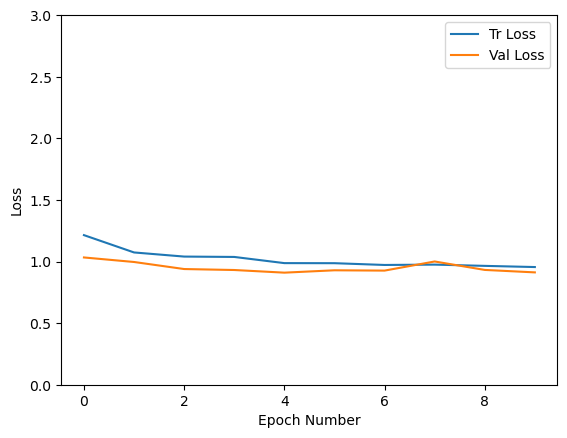

In [23]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.savefig('dataverse_loss_curve.png')
plt.show()

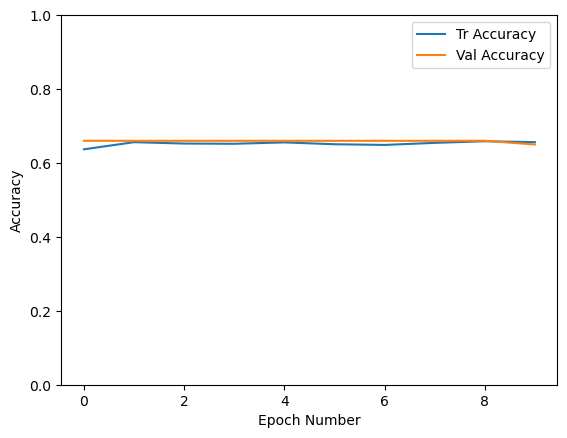

In [24]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig('dataverse_accuracy_curve.png')
plt.show()

In [25]:
def computeTestSetAccuracy(model, loss_criterion):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    test_acc = 0.0
    test_loss = 0.0
    
    with torch.no_grad():
        model.eval()
        
        for j, (inputs, labels) in enumerate(test_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            
            loss = loss_criterion(outputs, labels)
            
            test_loss += loss.item() * inputs.size(0)

            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            test_acc += acc.item() * inputs.size(0)

            print("Test Batch number: {:03d}, Test: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

    avg_test_loss = test_loss/test_data_size 
    avg_test_acc = test_acc/test_data_size

    print("Test accuracy : " + str(avg_test_acc))

In [26]:
computeTestSetAccuracy(resnet50, loss_func)

Test Batch number: 000, Test: Loss: 0.6137, Accuracy: 0.7500
Test Batch number: 001, Test: Loss: 1.1870, Accuracy: 0.6250
Test Batch number: 002, Test: Loss: 0.4448, Accuracy: 1.0000
Test Batch number: 003, Test: Loss: 1.0669, Accuracy: 0.6250
Test Batch number: 004, Test: Loss: 1.5189, Accuracy: 0.3750
Test Batch number: 005, Test: Loss: 1.9466, Accuracy: 0.2500
Test Batch number: 006, Test: Loss: 0.8929, Accuracy: 0.6250
Test Batch number: 007, Test: Loss: 2.0593, Accuracy: 0.3750
Test Batch number: 008, Test: Loss: 0.1687, Accuracy: 1.0000
Test Batch number: 009, Test: Loss: 0.5880, Accuracy: 0.7500
Test Batch number: 010, Test: Loss: 1.2934, Accuracy: 0.6250
Test Batch number: 011, Test: Loss: 0.9063, Accuracy: 0.3750
Test Batch number: 012, Test: Loss: 0.9450, Accuracy: 0.7500
Test Batch number: 013, Test: Loss: 0.1618, Accuracy: 1.0000
Test Batch number: 014, Test: Loss: 1.3146, Accuracy: 0.6250
Test Batch number: 015, Test: Loss: 0.4703, Accuracy: 0.8750
Test Batch number: 016, 

In [15]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    
    transform = image_transforms['test']

    test_image = Image.open(test_image_name)
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)
    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        ls = torch.sum(ps)
        ps = ps/ls
        print(ps)
        topk, topclass = ps.topk(3, dim=1)
        cls = labels[topclass.cpu().numpy()[0][0]]
        score = topk.cpu().numpy()[0][0]

        for i in range(3):
            print("Prediction", i+1, ":", topclass.cpu().numpy()[0][i], ", Score: ", topk.cpu().numpy()[0][i])


tensor([[1.5709e-04, 7.7453e-04, 9.8080e-04, 1.1630e-05, 3.6908e-03, 9.9432e-01,
         6.1688e-05]], device='cuda:0')
Prediction 1 : 5 , Score:  0.9943235
Prediction 2 : 4 , Score:  0.0036908055
Prediction 3 : 2 , Score:  0.0009808027


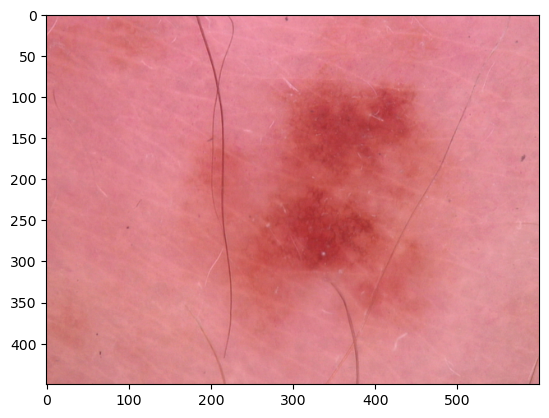

In [16]:
# image_path = os.path.join(ROOT_DIR, "image_set_1")
# predict(resnet50, "C:/Users/aarya/Downloads/dataverse_files/image_set_1/ISIC_0024306.jpg")
predict(resnet50, "C:/Users/Rahul Deepak/OneDrive/Desktop/dataverse_relevant_files/dataverse_relevant_files/train_folder/nv/ISIC_0024307.jpg")

In [27]:
data_df = pd.read_csv("C:/Users/Rahul Deepak/OneDrive/Desktop/dataverse_relevant_files/dataverse_relevant_files/ISIC2018_Task3_Test_GroundTruth.csv")
print(data_df.to_markdown())

unique_labels = list(set(data_df["dx"]))

|      | lesion_id       | image_id     | dx    | dx_type   |   age | sex     | localization    | dataset       |
|-----:|:----------------|:-------------|:------|:----------|------:|:--------|:----------------|:--------------|
|    0 | HAMTEST_0000000 | ISIC_0034524 | nv    | follow_up |    40 | female  | back            | vidir_molemax |
|    1 | HAMTEST_0000001 | ISIC_0034525 | nv    | histo     |    70 | male    | abdomen         | rosendahl     |
|    2 | HAMTEST_0000002 | ISIC_0034526 | bkl   | histo     |    70 | male    | back            | rosendahl     |
|    3 | HAMTEST_0000003 | ISIC_0034527 | nv    | histo     |    35 | male    | trunk           | vienna_dias   |
|    4 | HAMTEST_0000004 | ISIC_0034528 | nv    | follow_up |    75 | female  | trunk           | vidir_molemax |
|    5 | HAMTEST_0000005 | ISIC_0034529 | mel   | histo     |   nan | unknown | unknown         | external      |
|    6 | HAMTEST_0000006 | ISIC_0034530 | nv    | follow_up |    45 | male    | lower ex

In [28]:
def encode_label(idx, num_classes):
    target_vec = [0 for _ in range(num_classes)]
    target_vec[idx] = 1
    return target_vec

def augment_image(image, crop_size_w=256, crop_size_h=256):
    transform = transforms.Compose([
        transforms.RandomCrop((crop_size_w, crop_size_h)),
        transforms.RandomRotation(degrees=(-45, 45)),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    if isinstance(image, torch.Tensor):
        image = transforms.ToPILImage()(image)
    
    augmented_image = transform(image)
    return augmented_image.to(device)

def sharpen(x, T):
    temp = x**(1/T)
    mean_temp = temp.sum(axis=1, keepdims=True)
    normalised_temp = temp/mean_temp
    return normalised_temp


def mixup(x1, x2, y1, y2, alpha):
    beta = np.random.beta(alpha, alpha)
    beta = max(beta, 1-beta)
    x = beta*x1.to(device) + (1-beta)*x2.to(device)
    y = beta*y1.to(device) + (1-beta)*y2.to(device)
    return x, y

In [29]:
def mixmatch(x, y, u, model, batch_size=8, T=0.25, K=2, alpha=0.9):
    print("Mixmatch called")
    y_vec = []
    for idx in y:
        y_vec.append(encode_label(idx, NUM_CLASSES))
    y_vec = torch.tensor(y_vec)

    x_aug=[]
    u_aug=[]
    q=[]
    for b in range(batch_size):
        x_aug.append(augment_image(x[b]))
        plt.imshow(transforms.ToPILImage()(x[b]))
        u_k=[]
        for k in range(K):
            u_k.append(augment_image(u[k]))
        u_aug.append(u_k)
        # print(type(model(u_k[0].unsqueeze(0))))
        u_k_predictions = torch.stack([model(image.unsqueeze(0)) for image in u_k])
        u_k_sharp = sharpen(u_k_predictions.sum(dim=0) / K, T)
        q.append(u_k_sharp[0])
    
    X_cap = []
    p_cap = []
    U_cap = []
    q_cap = []
    for theta in range(len(x)):
        X_cap.append(x_aug[theta])
        p_cap.append(y_vec[theta])
        for delta in range(len(u_aug[theta])):
            U_cap.append(u_aug[theta][delta])
            q_cap.append(q[theta])
    
    indices = np.arange(len(X_cap)+len(U_cap))
    np.random.shuffle(indices)

    W_cap = []
    W_label_cap = []
    for index in indices:
        if index < len(X_cap):
            W_cap.append(X_cap[index])
            W_label_cap.append(p_cap[index])
        else:
            W_cap.append(U_cap[index-len(X_cap)])
            W_label_cap.append(q_cap[index-len(X_cap)])
        
    X_dash=[]
    p_dash=[]
    for phi in range(len(X_cap)):
        cur_x_dash, cur_p_dash = mixup(X_cap[phi], W_cap[phi], y_vec[phi],
            W_label_cap[phi], alpha)
        X_dash.append(cur_x_dash)
        p_dash.append(cur_p_dash)
    
    U_dash=[]
    q_dash=[]
    for omega in range(len(U_cap)):
        cur_u_dash, cur_q_dash = mixup(U_cap[omega], W_cap[len(X_cap)+omega],
            q_cap[omega], W_label_cap[len(X_cap)+omega], alpha)
        U_dash.append(cur_u_dash)
        q_dash.append(cur_q_dash)

    return X_dash, U_dash, p_dash, q_dash


class MixMatchWrapper:
    def __init__(self, x_labeled, y_labeled, x_unlabeled, model, batch_size=8, T=0.5, K=2, alpha=0.7):
        self.x_labeled = x_labeled
        self.y_labeled = y_labeled
        self.x_unlabeled = x_unlabeled
        self.model = model
        self.batch_size = batch_size
        self.T = T
        self.K = K
        self.alpha = alpha

    def __iter__(self):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        for i in range(0, len(self.x_labeled), self.batch_size):
            x_batch = self.x_labeled[i:i+self.batch_size]
            y_batch = self.y_labeled[i:i+self.batch_size]
            u_batch = self.x_unlabeled[i:i+self.batch_size]

            x_batch_cuda = torch.stack(x_batch).to(device)
            y_batch_cuda = torch.tensor(y_batch).to(device)  # Fix: Convert to tensor
            u_batch_cuda = torch.stack(u_batch).to(device)
            
            X_dash, U_dash, p_dash, q_dash = mixmatch(x_batch_cuda, y_batch_cuda, u_batch_cuda,
                self.model.to(device), len(x_batch), self.T, self.K, self.alpha)

            # Now, X_dash, U_dash, p_dash, and q_dash are lists, convert them to tensors
            X_dash = torch.stack(X_dash).to(device)
            U_dash = torch.stack(U_dash).to(device)
            p_dash = torch.stack(p_dash).to(device)
            q_dash = torch.stack(q_dash).to(device)

            yield X_dash, U_dash, p_dash, q_dash

In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def calculate_accuracy(outputs, targets):
    _, predictions = torch.max(outputs.data, 1)
    target_indices = torch.argmax(targets.data, dim=1)
    correct_counts = predictions.eq(target_indices)
    acc = torch.mean(correct_counts.type(torch.FloatTensor))
    return acc


def train_mixmatch(model, batch_size, epochs):
    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None
    best_model = model
    optimizer = optim.Adam(model.parameters(), lr=0.002)
    
    classification_loss = nn.CrossEntropyLoss()
    consistency_loss = nn.MSELoss()

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        model.train()
        # model.to(device)
        
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        len_itr  =  0
        mm = MixMatchWrapper(labelled_images, labels, unlabelled_images, model, batch_size=batch_size)
        
        for i, (X, U, p, q) in enumerate(mm):
            print(f"Batch number: {i}")

            optimizer.zero_grad()
            
            # x_dash=torch.stack(X).to(device)
            # u_dash=torch.stack(U).to(device)
            # p_dash=torch.stack(p).to(device)
            # q_dash=torch.stack(q).to(device)

            logits_x=model(X).to(device)
            logits_u=model(U).to(device)

            # print("Logits_x raw:", logits_x)
            
            print("Logits_x:", logits_x.shape)
            print("p_dash:", p.shape)
            print("logits_u:", logits_u.shape)
            print("q_dash:", q.shape)
            
            loss_cls=classification_loss(logits_x, p)
            loss_con=consistency_loss(logits_u, q)

            loss=loss_cls+loss_con
            if loss < best_loss:
                best_loss = loss
                best_model = model
            loss.backward()
            optimizer.step()
            
            lab_acc = calculate_accuracy(logits_x, p)
            unlab_acc = calculate_accuracy(logits_u, q)
            train_acc += (lab_acc + unlab_acc)
            len_itr += 1
            print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), lab_acc+unlab_acc))


        train_acc /= len_itr

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}, Training Accuracy: {train_acc:.4f}")
    
    torch.save(model.state_dict(), 'mixmatch_resnet50.pth')

    return best_model

In [42]:
import torch
batch_size = 16
epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet50 = models.resnet50(pretrained=True)
for param in resnet50.parameters():
    param.requires_grad = False

fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, NUM_CLASSES) # , 
    # nn.LogSoftmax(dim=1) # For using NLLLoss()
)

resnet50 = resnet50.to(device)

resnet=train_mixmatch(resnet50, batch_size, epochs)

c:\Users\Rahul Deepak\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rahul Deepak\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 1/20
Mixmatch called
Batch number: 0
Logits_x: torch.Size([16, 7])
p_dash: torch.Size([16, 7])
logits_u: torch.Size([32, 7])
q_dash: torch.Size([32, 7])
Batch number: 000, Training: Loss: 2.0395, Accuracy: 0.3750
Mixmatch called
Batch number: 1
Logits_x: torch.Size([16, 7])
p_dash: torch.Size([16, 7])
logits_u: torch.Size([32, 7])
q_dash: torch.Size([32, 7])
Batch number: 001, Training: Loss: 6.1742, Accuracy: 1.6250
Mixmatch called
Batch number: 2
Logits_x: torch.Size([16, 7])
p_dash: torch.Size([16, 7])
logits_u: torch.Size([32, 7])
q_dash: torch.Size([32, 7])
Batch number: 002, Training: Loss: 2.4277, Accuracy: 0.6250
Mixmatch called
Batch number: 3
Logits_x: torch.Size([16, 7])
p_dash: torch.Size([16, 7])
logits_u: torch.Size([32, 7])
q_dash: torch.Size([32, 7])
Batch number: 003, Training: Loss: 2.5008, Accuracy: 0.5312
Mixmatch called
Batch number: 4
Logits_x: torch.Size([16, 7])
p_dash: torch.Size([16, 7])
logits_u: torch.Size([32, 7])
q_dash: torch.Size([32, 7])
Batch nu

In [ ]:
all_seg_directory = os.path.join(ROOT_DIR, "all_images_segregated")
all_data_set = datasets.ImageFolder(all_seg_directory, transform=image_transforms["train"])

all_data_list = list(all_data_set)
np.random.shuffle(all_data_list)

all_data_loader = DataLoader(all_data_list, batch_size=batch_size, shuffle=True)

In [ ]:
def test_model(model, test_loader, device):
    model.eval()

    all_predictions = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for test_images, test_labels in test_loader:
            test_images, test_labels = test_images.to(device), test_labels.to(device)
            
            outputs = model(test_images)

            probabilities = torch.softmax(outputs, dim=1)
            
            print(test_labels)
            print(probabilities)
            print("--------")
            
            _, predicted = torch.max(outputs.data, 1)
            total += test_labels.size(0)
            correct += (predicted == test_labels).sum().item()
            
            batch_predictions = []
            for i in range(test_images.size(0)):
                prediction_info = {
                    "ImageID": i,
                    "PredictedLabel": predicted[i].item(),
                    "ActualLabel": test_labels[i].item()
                }
                
                for class_idx in range(NUM_CLASSES):
                    prediction_info[f"ProbClass{class_idx}"] = probabilities[i][class_idx].item()
                
                batch_predictions.append(prediction_info)
                
            all_predictions.extend(batch_predictions)
    
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

    df = pd.DataFrame(all_predictions)
    df.to_csv("pred.csv", index=False)
    return df

In [ ]:
test_model(resnet50, all_data_loader, device)

tensor([5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], device='cuda:0')
tensor([[0.0453, 0.0475, 0.0421, 0.0491, 0.0455, 0.7180, 0.0526],
        [0.0160, 0.0171, 0.0133, 0.0193, 0.0148, 0.8977, 0.0218],
        [0.0541, 0.0549, 0.0501, 0.0565, 0.0557, 0.6706, 0.0581],
        [0.0587, 0.0618, 0.0565, 0.0625, 0.0597, 0.6345, 0.0663],
        [0.0306, 0.0327, 0.0272, 0.0342, 0.0297, 0.8063, 0.0392],
        [0.0413, 0.0431, 0.0371, 0.0444, 0.0411, 0.7440, 0.0490],
        [0.0499, 0.0509, 0.0468, 0.0531, 0.0508, 0.6938, 0.0547],
        [0.0601, 0.0609, 0.0574, 0.0626, 0.0616, 0.6330, 0.0643],
        [0.0816, 0.0847, 0.0798, 0.0825, 0.0857, 0.5004, 0.0853],
        [0.0505, 0.0519, 0.0464, 0.0533, 0.0517, 0.6906, 0.0556],
        [0.0555, 0.0568, 0.0517, 0.0580, 0.0567, 0.6607, 0.0607],
        [0.0839, 0.0866, 0.0809, 0.0836, 0.0890, 0.4901, 0.0860],
        [0.0152, 0.0164, 0.0128, 0.0180, 0.0142, 0.9019, 0.0215],
        [0.0505, 0.0527, 0.0460, 0.0533, 0.0513, 0.6887, 0.0577],
  

,ImageID,PredictedLabel,ActualLabel,ProbClass0,ProbClass1,ProbClass2,ProbClass3,ProbClass4,ProbClass5,ProbClass6
0,0,5,5,0.045250,0.047521,0.042086,0.049096,0.045498,0.717978,0.052570
1,1,5,5,0.015989,0.017073,0.013303,0.019302,0.014797,0.897693,0.021844
2,2,5,5,0.054064,0.054931,0.050103,0.056482,0.055673,0.670643,0.058104
3,3,5,2,0.058691,0.061794,0.056522,0.062476,0.059675,0.634523,0.066318
4,4,5,2,0.030629,0.032701,0.027209,0.034242,0.029702,0.806297,0.039219
...,...,...,...,...,...,...,...,...,...,...
733,13,5,5,0.051236,0.052241,0.047799,0.054148,0.052238,0.686204,0.056134
734,14,5,2,0.074844,0.078485,0.072524,0.076848,0.078609,0.539310,0.079379
735,15,5,4,0.025684,0.028140,0.027876,0.028352,0.034265,0.826229,0.029455
736,0,5,5,0.045305,0.047538,0.040832,0.048925,0.045892,0.719638,0.051871
